<h1 align="center">Volume 1: Facial Recognition.</h1>

    Jacob Francis
    Lab 1
    28 Nov 2023

In [2]:
import os
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
from scipy import linalg as la 

### Helper Functions

In [80]:
def get_faces(path="./voltGraphs"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, pilmode="F")))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./voltGraphs"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, pilmode="F"))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [81]:
def show(image, m=280, n=624): 
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    # Reshape image and show it in grayscale
    image = image.reshape(m,n) 
    plt.imshow(image, cmap="gray")
    plt.show()

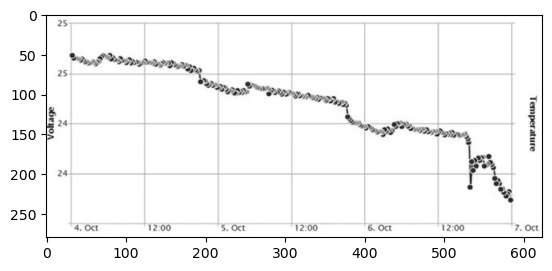

In [84]:
# Construct F and show one of the faces
F = get_faces()
show(F[:,10])

In [94]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./voltGraphs'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path) # Array of all images as column vectors (from path)
        self.mu = np.mean(self.F,axis=1) # Find the mean of each column (aka. mean of all faces)
        self.Fbar = np.subtract(self.F.T,self.mu).T # Images shifted by mu
        self.U = la.svd(self.Fbar, full_matrices = False)[0] # Compute the compact SVD of Fbar and save U as an attribute

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        F_hat = self.U[:,:s].T@A # Compute F_hat, the projection

        return F_hat

    # Problem 5
    def find_nearest(self, g, s=12):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        f_hat = self.project(self.Fbar,s) # Compute fhat and ghat
        g_bar = g.T-self.mu
        g_hat = self.project(g_bar.T,s)
        f_list = []
        for i in range(f_hat.shape[1]):
            f_list.append(la.norm(f_hat[:,i]-g_hat)) # Make a list of norms for each column of fhat minus ghat
        j = np.argmin(f_list) # Find the column (face) closest to ghat
        
        return j
        

    # Problem 6
    def match(self, image, s=38, m=280, n=624):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        j = self.find_nearest(image,s) # Find the index of the best matching face
        show(image,m,n) # Show original image
        show(self.F[:,j]) # Show the best match


### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [95]:
J = FacialRec() # Create a FacialRec object 


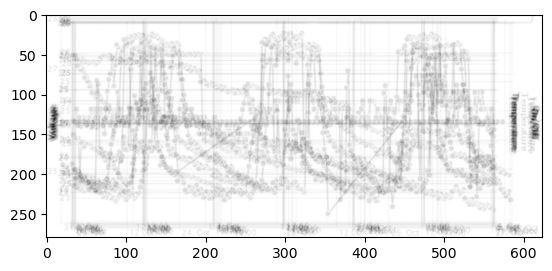

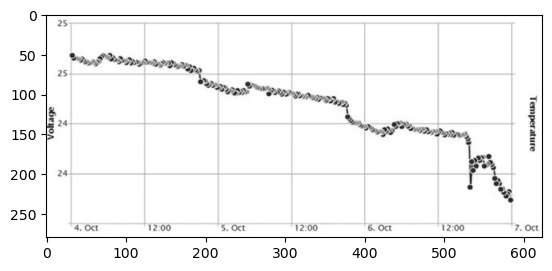

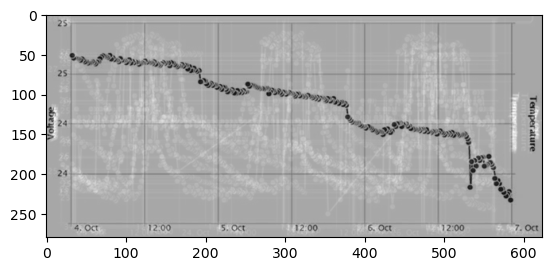

In [96]:
# Show the mean face, a face, and the mean-shifted face
show(J.mu)
show(J.F[:,10])
show(J.Fbar[:,10])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


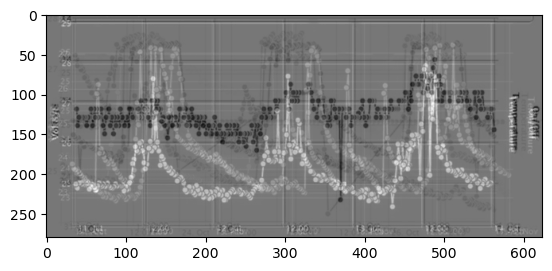

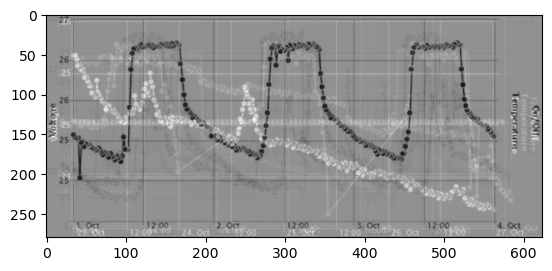

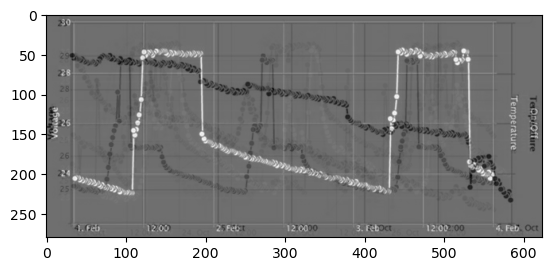

In [99]:
# Display some eigenfaces
show(J.U[:,0])
show(J.U[:,5])
show(J.U[:,10])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

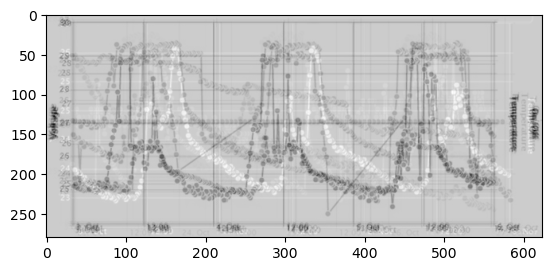

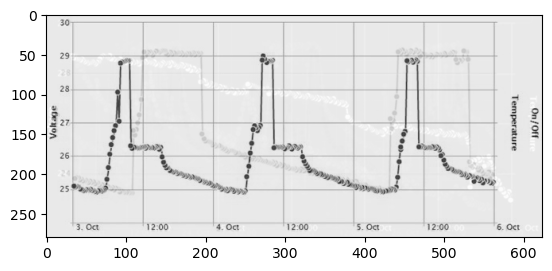

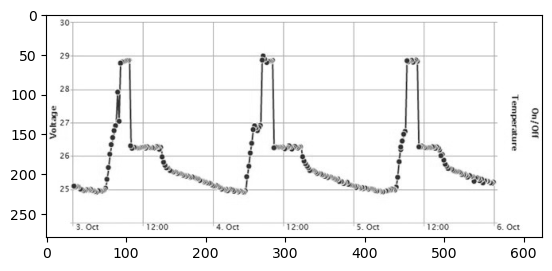

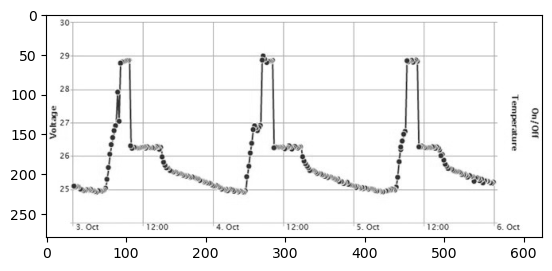

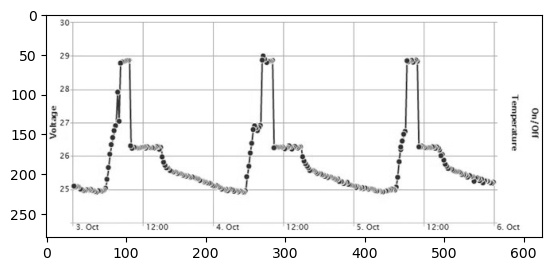

In [103]:
# Calculate f_hat and f tilde for s values: 5,15,20,75
f_hat = J.project(J.Fbar[:,0],5)
f5 = J.U[:,:5]@f_hat + J.mu
f_hat = J.project(J.Fbar[:,0],10)
f15 = J.U[:,:10]@f_hat + J.mu
f_hat = J.project(J.Fbar[:,0],20)
f20 = J.U[:,:20]@f_hat + J.mu
f_hat = J.project(J.Fbar[:,0],75)
f75 = J.U[:,:75]@f_hat + J.mu
# Show the reconstructions
show(f5)
show(f15)
show(f20)
show(f75)
show(J.F[:,0]) # Original


### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

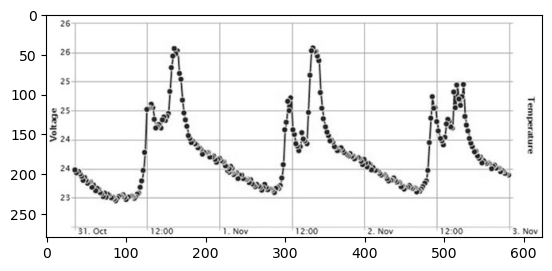

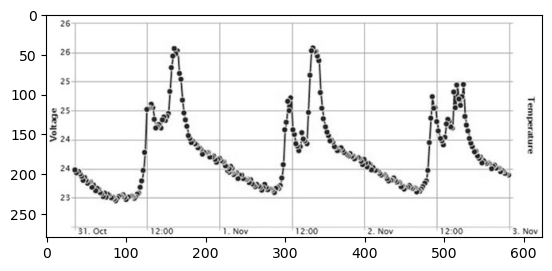

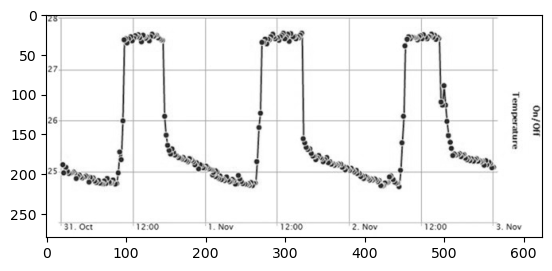

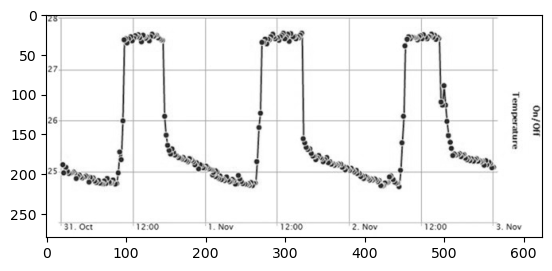

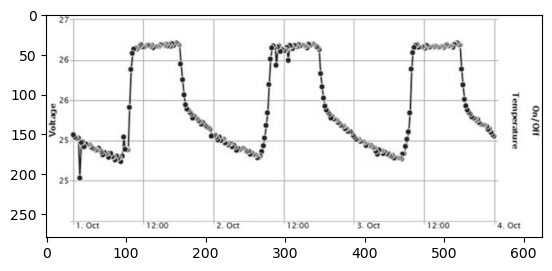

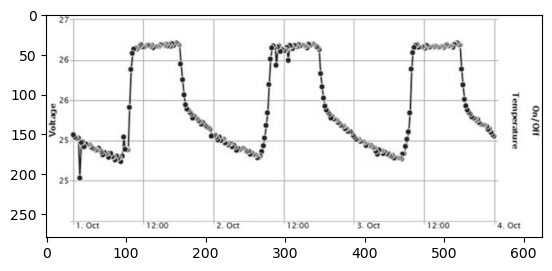

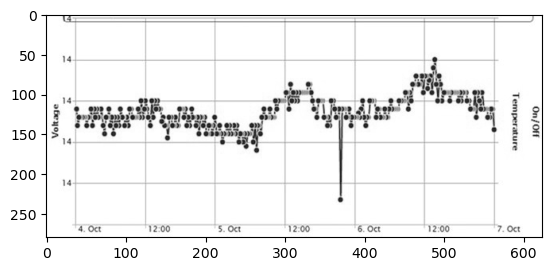

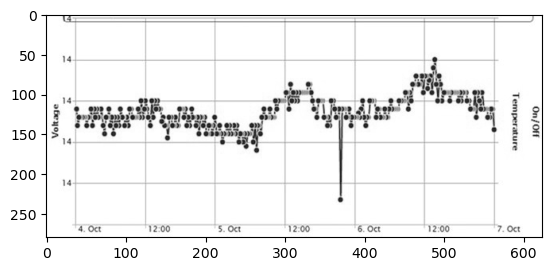

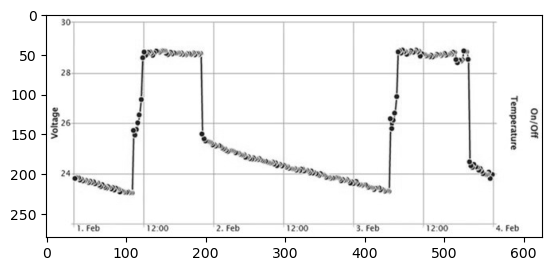

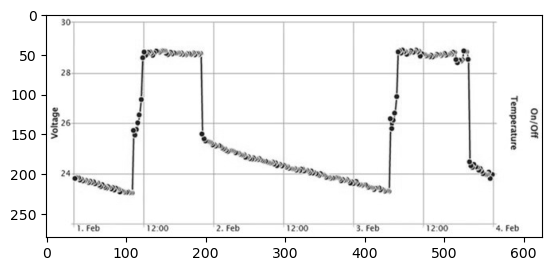

In [100]:
for test_image in sample_faces(5): # Execute the match() function for various test faces
    J.match(test_image)
